## Гераськин Ярослав

### Выводим оценки:
![](images/1.png)

## Проводим эксперимент

In [1]:
import numpy as np
from functools import partial, reduce
from operator import truediv
from matplotlib import pyplot as plt

In [2]:
class U:
    def gen(theta, n_samples):
        return np.random.uniform(0, theta, n_samples)
    
    def theta_estimate(samples, k):
        return np.power((k + 1) * np.power(samples, k).mean(), 1 / k)

    
class Exp:
    def gen(theta, n_samples):
        return np.random.exponential(theta, n_samples)
    
    def theta_estimate(samples, k):
        res = np.power(samples, k).mean()
        res = reduce(truediv, range(1, k + 1), res) # res = res / k!
        return np.power(res, 1 / k) 

In [3]:
def experiment(thetas, moments, n_samples, n_iters, distr):
    res = np.zeros((len(thetas), len(moments)))
    for i, theta in enumerate(thetas):
        for j, k in enumerate(moments):
            for _ in range(n_iters):
                samples = distr.gen(theta, n_samples)
                theta_hat = distr.theta_estimate(samples, k)
                res[i][j] += (theta - theta_hat) ** 2
            res[i][j] /= n_iters
    return res


def calc(thetas, moments, n_samples, n_iters):
    res = dict()
    for distr in (U, Exp):
        res[distr.__name__] = experiment(thetas, moments, n_samples, n_iters, distr)
    return res

def plot(res, thetas, moments):
    fig, ax = plt.subplots(2, figsize=(10, 10))
    for i, (distr_name, distr_res) in enumerate(res.items()):
        ax[i].set_xlabel("k")
        ax[i].set_ylabel("MSE")
        ax[i].set_title(distr_name)
        for row, theta in zip(distr_res, thetas):
            ax[i].plot(moments, row, "o-",label=f"theta={theta}")
        ax[i].set_xticks(moments[::2])
        ax[i].legend()

In [4]:
thetas = [1, 2, 3, 4, 5]
n_moments = 40
moments = list(range(1, n_moments + 1))
n_samples = 1000
n_iters = 1000

In [5]:
res = calc(thetas, moments, n_samples, n_iters)

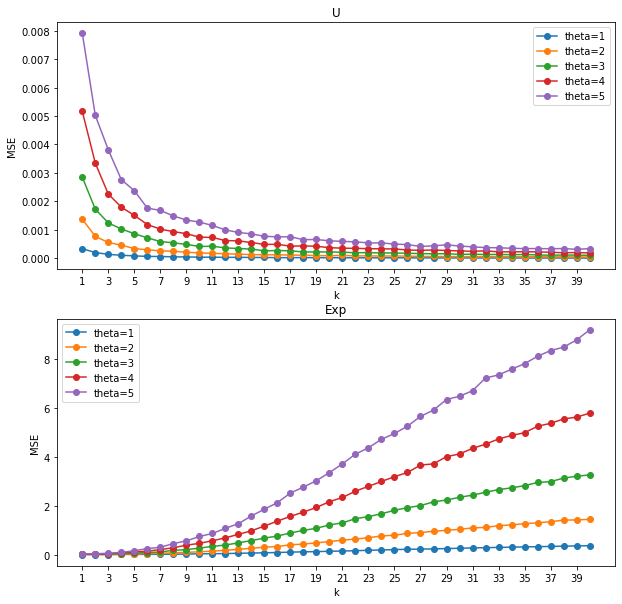

In [6]:
plot(res, thetas, moments)

In [7]:
thetas = [1, 2, 3, 4, 5]
n_moments = 40
moments = list(range(1, n_moments + 1))
n_samples = 200
n_iters = 2000

In [8]:
res = calc(thetas, moments, n_samples, n_iters)

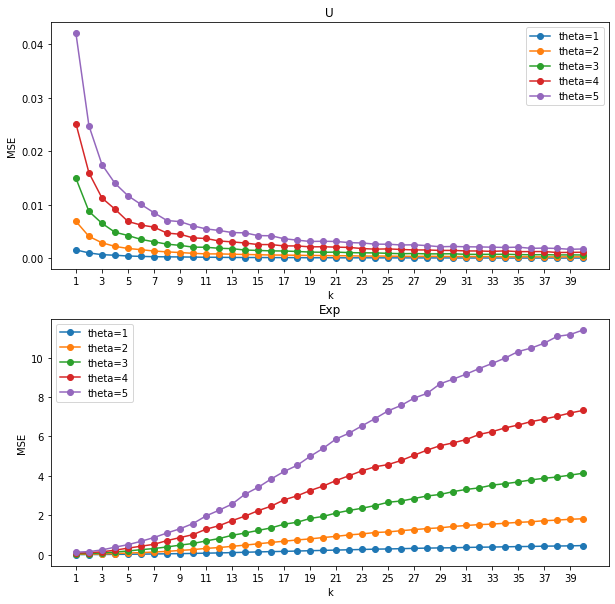

In [9]:
plot(res, thetas, moments)

In [10]:
thetas = [1, 2, 3, 4, 5]
n_moments = 40
moments = list(range(1, n_moments + 1))
n_samples = 10
n_iters = 5000

In [11]:
res = calc(thetas, moments, n_samples, n_iters)

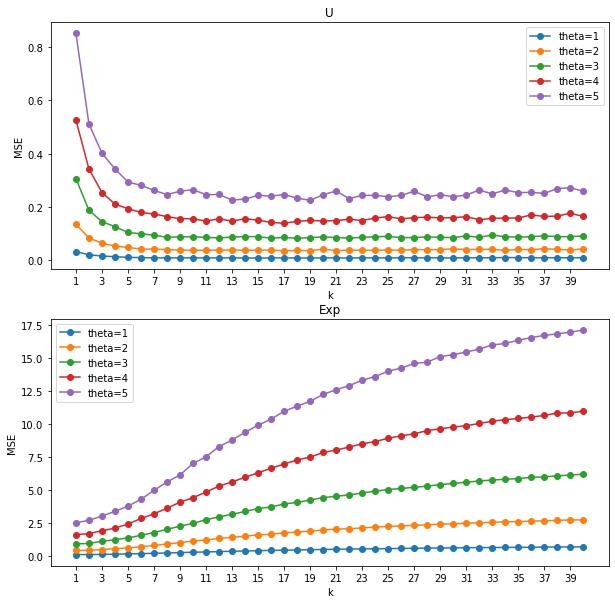

In [12]:
plot(res, thetas, moments)

В первом случае $U[0, \theta]$ оказывается, что $k$ лучше брать побольше (хотя бы 25-30), во втором случае $(Exp(\theta))$ MSE минимальна при $k=1$.